In [ ]:
#Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [ ]:
#Cargamos el dataset
url="https://raw.githubusercontent.com/carlosmejia28/08MBID---Visualizacion-de-Datos/main/ACCIDENTES_DE_TRANSITO_DESDE_ENERO_2012_A_FEBRERO_DE_2023.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))

#Informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38190 entries, 0 to 38189
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ORDEN                    38190 non-null  int64 
 1   FECHA                    38190 non-null  object
 2   AÑO                      38190 non-null  int64 
 3   MES                      38190 non-null  object
 4   DÍA_SEMANA_NOMBRE        38190 non-null  object
 5   GRAVEDAD                 38190 non-null  object
 6   PEATON                   38190 non-null  int64 
 7   AUTOMOVIL                38190 non-null  int64 
 8   CAMPAERO                 38190 non-null  int64 
 9   CAMIONETA                38190 non-null  int64 
 10  MICRO                    38190 non-null  int64 
 11  BUSETA                   38190 non-null  int64 
 12  BUS                      38190 non-null  int64 
 13  CAMION                   38190 non-null  int64 
 14  VOLQUETA                 38190 non-nul

In [ ]:
df

,ORDEN,FECHA,AÑO,MES,DÍA_SEMANA_NOMBRE,GRAVEDAD,PEATON,AUTOMOVIL,CAMPAERO,CAMIONETA,...,BARRIO,HORA,ENTIDAD,nombrecomuna,Propietario de Vehículo,DIURNIO/NOCTURNO,HORA RESTRICCION MOTO,DÍA_MES_NUM,DÍA_SEMANA_NUM,MES_NUM
0,1,2012-01-01,2012,01. Enero,07. Domingo,Con Heridos,0,1,0,0,...,Mutis,12:15:00 p. m.,AGENTES DTB,17. MUTIS,Particular,Diurno,No aplica,1,7,1
1,2,2012-01-01,2012,01. Enero,07. Domingo,Solo Daños,0,1,0,1,...,Regaderos Norte,02:00:00 p. m.,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno,No aplica,1,7,1
2,3,2012-01-01,2012,01. Enero,07. Domingo,Solo Daños,0,0,0,1,...,Cabecera del Llano,12:00:00 p. m.,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno,No aplica,1,7,1
3,4,2012-01-01,2012,01. Enero,07. Domingo,Solo Daños,0,1,0,1,...,Norte Bajo,06:30:00 p. m.,AGENTES DTB,03. SAN FRANCISCO,Particular,Nocturno,No aplica,1,7,1
4,5,2012-01-01,2012,01. Enero,07. Domingo,Con Heridos,1,0,0,0,...,Dangond,12:30:00 a. m.,AGENTES DTB,11. SUR,Particular,Nocturno,En restricción,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38185,38193,2023-06-02,2023,02. Febrero,01. Lunes,Con muertos,0,0,0,0,...,Diamante II,01:10:00 a. m.,AGENTES DE TRANSITO DTB,10. PROVENZA,Particular,Nocturno,Sin informacion,2,5,6
38186,38194,2023-02-15,2023,02. Febrero,03. Miercoles,Con muertos,0,0,0,0,...,Rio de Oro I,03:40:00 p. m.,AGENTES DE TRANSITO DTB,04. OCCIDENTAL,Particular,Diurno,Sin informacion,15,3,2
38187,38195,2023-02-17,2023,02. Febrero,05. Viernes,Con muertos,0,0,0,0,...,San Alonso,03:15:00 a. m.,AGENTES DE TRANSITO DTB,13. ORIENTAL,Empresa,Nocturno,Sin informacion,17,5,2
38188,38196,2023-02-19,2023,02. Febrero,07. Domingo,Con muertos,0,0,0,0,...,Campo Hermoso,11:30:00 p. m.,AGENTES DE TRANSITO DTB,05. GARCIA ROVIRA,Particular,Nocturno,Sin informacion,19,7,2


In [ ]:
df.describe()

,ORDEN,AÑO,PEATON,AUTOMOVIL,CAMPAERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO,DÍA_MES_NUM,DÍA_SEMANA_NUM,MES_NUM
count,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000,38190.000000
mean,19099.707803,2016.480649,0.104713,0.784237,0.060906,0.197565,0.020293,0.044043,0.048154,0.083242,0.014245,0.611783,0.017387,0.021079,15.640377,3.961718,6.493009
std,11026.493780,3.063176,0.339368,0.719981,0.245856,0.432224,0.141929,0.211601,0.218213,0.287492,0.120036,0.652562,0.132302,0.149368,8.734892,1.959032,3.466450
min,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,9550.250000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,3.000000
50%,19100.500000,2016.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,16.000000,4.000000,7.000000
75%,28647.750000,2019.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,23.000000,6.000000,9.000000
max,38197.000000,2023.000000,7.000000,4.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,8.000000,3.000000,2.000000,31.000000,7.000000,12.000000


In [ ]:
df.columns.tolist()

['FECHA',
 'AÑO',
 'MES',
 'DÍA_SEMANA_NOMBRE',
 'GRAVEDAD',
 'PEATON',
 'AUTOMOVIL',
 'CAMPAERO',
 'CAMIONETA',
 'MICRO',
 'BUSETA',
 'BUS',
 'CAMION',
 'VOLQUETA',
 'MOTO',
 'BICICLETA',
 'OTRO',
 'HORA',
 'DIURNIO/NOCTURNO',
 'HORA RESTRICCION MOTO',
 'DÍA_MES_NUM',
 'DÍA_SEMANA_NUM',
 'MES_NUM']

In [ ]:
df['MES']

0          01. Enero
1          01. Enero
2          01. Enero
3          01. Enero
4          01. Enero
            ...     
38185    02. Febrero
38186    02. Febrero
38187    02. Febrero
38188    02. Febrero
38189      03. Marzo
Name: MES, Length: 38190, dtype: object

In [ ]:
df['MES_NUM']

0        01
1        01
2        01
3        01
4        01
         ..
38185    02
38186    02
38187    02
38188    02
38189    03
Name: MES_NUM, Length: 38190, dtype: object

In [ ]:
df['MES_NOMBRE'].unique()

array([' Enero', ' Febrero', ' Marzo', ' Abril', ' Mayo', ' Junio',
       ' Julio', ' Agosto', ' Septiembre', ' Octubre', ' Noviembre',
       ' Diciembre'], dtype=object)

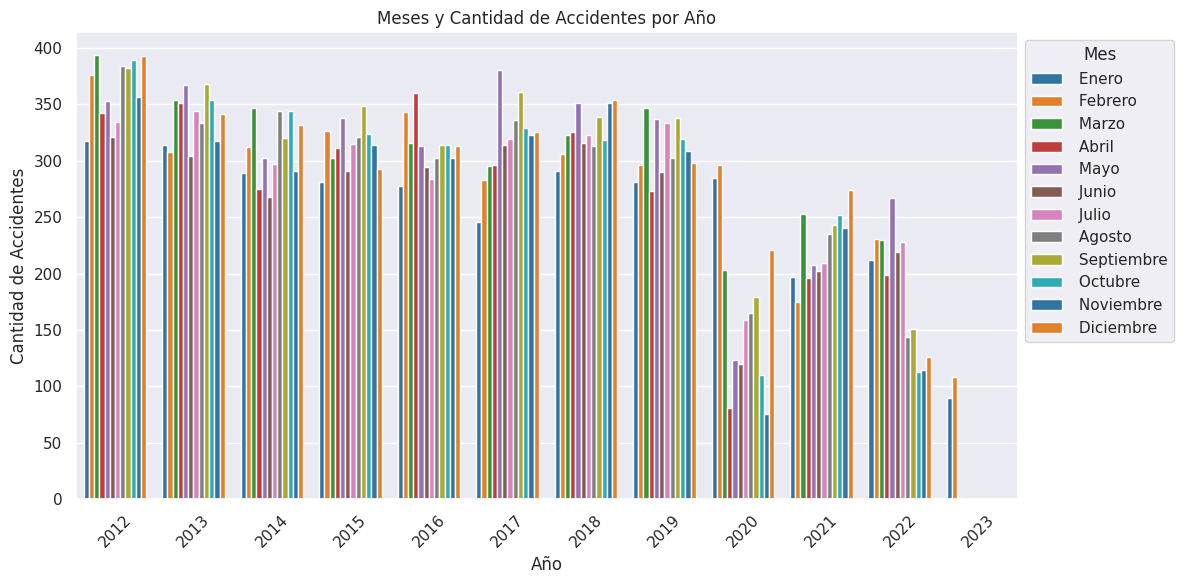

In [ ]:
# Agrupar los datos por año y mes y contar la cantidad de accidentes
accidentes_por_ano_mes = df.groupby(['AÑO', 'MES_NUM', 'MES_NOMBRE']).size().reset_index(name='Cantidad')

# Ordenar los datos por año y mes
accidentes_por_ano_mes = accidentes_por_ano_mes.sort_values(['AÑO', 'MES_NUM'])

# Crear una gráfica de barras agrupadas mejorada
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=accidentes_por_ano_mes, x='AÑO', y='Cantidad', hue='MES_NOMBRE', palette='tab10')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Accidentes')
ax.set_title('Meses y Cantidad de Accidentes por Año')


plt.legend(title='Mes', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

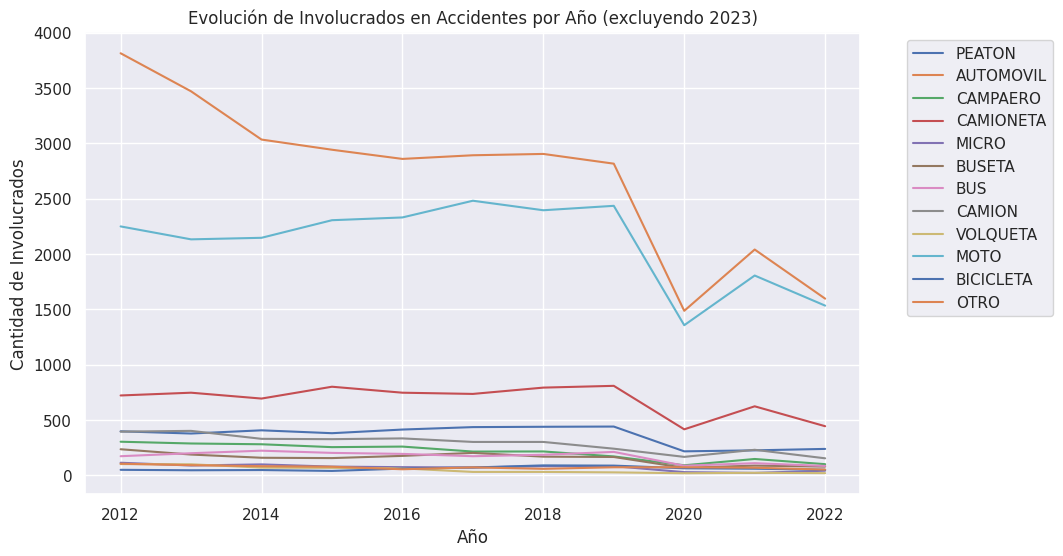

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para excluir el año 2023
df = df[df['AÑO'] != 2023]

# Agrupar los datos por año y sumar la cantidad de involucrados
involucrados_por_año = df.groupby('AÑO')[['PEATON', 'AUTOMOVIL', 'CAMPAERO', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS', 'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA', 'OTRO']].sum()

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 6))
involucrados_por_año.plot(kind='line', ax=ax)

# Configurar los títulos y etiquetas de los ejes
ax.set_title('Evolución de Involucrados en Accidentes por Año (excluyendo 2023)')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Involucrados')

# Ajustar la posición de la leyenda
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Agrupar los accidentes por día de la semana y sumar la cantidad de involucrados de cada tipo
involucrados_por_dia_semana = df.groupby('DÍA_SEMANA_NUM')[['PEATON', 'AUTOMOVIL', 'CAMPAERO', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS', 'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA', 'OTRO']].sum()

# Definir los nombres de los días de la semana para la etiqueta del eje x
nombres_dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Definir una paleta de colores personalizada
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']

# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Agregar las barras apiladas para cada tipo de involucrado
for i, col in enumerate(involucrados_por_dia_semana.columns):
    fig.add_trace(go.Bar(x=nombres_dias_semana, y=involucrados_por_dia_semana[col], name=col, marker_color=colores[i]))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Cantidad de accidentes e involucrados por día de la semana',
    xaxis_title='Día de la semana',
    yaxis_title='Cantidad de involucrados',
    barmode='stack'
)

# Mostrar el gráfico interactivo
fig.show()


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Agrupar los accidentes por gravedad y sumar la cantidad de involucrados de cada tipo
involucrados_por_gravedad = df.groupby('GRAVEDAD')[['PEATON', 'AUTOMOVIL', 'CAMPAERO', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS', 'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA', 'OTRO']].sum()

# Obtener las categorías de gravedad ordenadas por valor ascendente
categorias_gravedad = involucrados_por_gravedad.index.tolist()

# Definir una paleta de colores personalizada
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78']

# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Agregar las barras apiladas para cada tipo de involucrado y cada categoría de gravedad
for i, col in enumerate(involucrados_por_gravedad.columns):
    fig.add_trace(go.Bar(x=categorias_gravedad, y=involucrados_por_gravedad[col], name=col, marker_color=colores[i]))

# Personalizar el diseño del gráfico
fig.update_layout(
    title='Involucrados en accidentes por gravedad',
    xaxis_title='Gravedad',
    yaxis_title='Cantidad de involucrados',
    barmode='stack'
)

# Mostrar el gráfico interactivo
fig.show()


In [ ]:
# Contar los valores "registrados" en la columna
conteo = df['GRAVEDAD'].value_counts()['Solo daños']

# Mostrar el conteo
print(conteo)

4


In [ ]:
# Reemplazar los valores "en proceso" por "trabajando" en la columna
df['GRAVEDAD'] = df['GRAVEDAD'].replace('Solo daños', 'Solo Daños')

# Mostrar el DataFrame modificado
print(df)

In [ ]:
df.to_csv('archivo.csv', index=False)

Para usar **Power BI** se dejaran solo los datos del 2019 y 2022

In [ ]:
# Filtra los registros del año 2019 al 2022
df = df[(df['AÑO'] >= 2019) & (df['AÑO'] <= 2022)]

In [ ]:
df.to_excel('archivo_excel.xlsx', index=False)